# Three-dimensional images, NIfTI

We will spend a lot of time loading data from medical images.

MRI images for functional MRI are usually stored using the [NIfTi
format](https://nifti.nimh.nih.gov/nifti-1).

This is a very simple format that is typically a single file with
extension .  If the file is compressed, it will end with
`.nii.gz` instead.

Inside, the file contains:

* 352 bytes of *header* information.  The header gives the 3D or 4D shape of
  the file, and the data type of the pixel (voxel) data among other things.

* Usually, directly after the header, we have the image data.  If the image
  data is shape (I, J, K), and S is the number of bytes to store one pixel
  (voxel) value, then the image data is I \* J \* K \* S in length.  For example,
  the image might be shape 64, 64, 32, and the data type might be 64-bit
  float, which is 8 bytes long, so the image data would be 64 \* 64 \* 32 \* 8
  bytes long.

To load these images into MATLAB, use the [SPM](http://www.fil.ion.ucl.ac.uk/spm/) package.  Here we are using Python, and the [Nibabel](http://nipy.org/nibabel) package.

Install Nibabel with something like:

```
pip install --user nibabel
```

Now, download the example image we are going to use to your working directory: `ds114_sub009_highres.nii`.

Start the Jupyter Notebook / the IPython console.

Import the nibabel library:

In [1]:
import nibabel as nib

Load the image into memory:

In [2]:
img = nib.load('ds114_sub009_highres.nii')
img

The image has a "header" containing the information about the image:

In [3]:
print(img.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 256 156 256   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [ 1.          1.          1.30022228  1.          0.00972     0.          0.
  0.        ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'FSL5.0'
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : -0.11747453361749649
quatern_c       : 0.008146101608872414
quatern_d       : 0.0224816054105758

This is looking at the same information that the `fslinfo` shows.  Here I'm calling `fslinfo` as if I was on the Unix command line:

In [4]:
!fslinfo ds114_sub009_highres.nii

data_type      FLOAT32
dim1           256
dim2           156
dim3           256
dim4           1
datatype       16
pixdim1        1.000000
pixdim2        1.300222
pixdim3        1.000000
pixdim4        0.009720
cal_max        0.0000
cal_min        0.0000
file_type      NIFTI-1+


We can load the image data as an array with:

In [5]:
data = img.get_data()
data.shape

(256, 156, 256)

Think of this as 256 2D images, stacked on top of one another.  Each 2D image is a "slice", of shape (256, 156).  To show this, we need the plotting commands:

In [6]:
# Show plots inside notebook
%matplotlib inline
# Import the array librar
import numpy as np
# Import the plotting library
import matplotlib.pyplot as plt
# Set 'gray' as the default colormap
plt.rcParams['image.cmap'] = 'gray'

The first (bottom) slice:

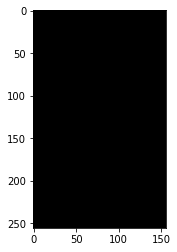

In [7]:
plt.imshow(data[:, :, 0])

The middle slice:

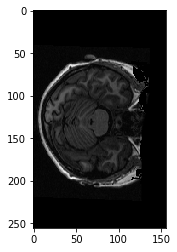

In [8]:
plt.imshow(data[:, :, 127])

As for any array, we can transpose it:

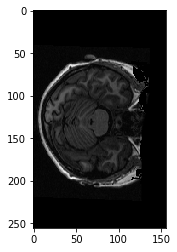

In [9]:
plt.imshow(data[:, :, 127])

To get the display you usually see, we need to transpose and flip up to down:

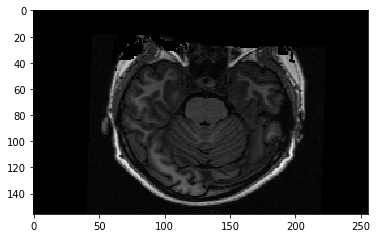

In [10]:
plt.imshow(np.flipud(data[:, :, 127].T))

We are looking at a slice over the third dimension.  We can see that the slices over this dimension are 2D images, where left to right is the first axis, and back to front is the second axis.

We can also think of this 3D image as a stack of 2D images where the 2D images are (back to front, bottom to top).   Like this:

In [11]:
yz_slice = data[127, :, :]
yz_slice.shape

(156, 256)

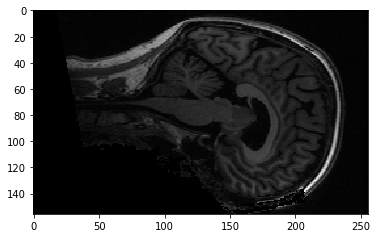

In [12]:
plt.imshow(yz_slice)

Here, we have all the pixels corresponding to 127 in the left to right direction, giving us an image of shape (156, 256).  You've seen these alternative slices in the FSL viewer.